# Project 1: SAT & ACT Analysis
---

The SAT (Scholastic Aptitude Test) is a standardised test in the United States, used by high school students for college admissions. It is administered by College Board and  consists of two main sections - Evidence-Based Reading and Writing (ERW), and Mathematics. For each section, the minimum score is 200 and the maximum is 800. The total SAT score is an addition of the two and therefore ranges from 400 - 1600 <sup>[[1]](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting)</sup>.

The ACT (American College Testing) is another standardised test used for college admissions in the US. It is made up of four compulsory sections - English, Mathematics, Reading, and Science, as well as an optional Writing paper. Each paper is scored from 1 - 36, and the composite score is an average of the total score from the four sections <sup>[[2]](https://www.princetonreview.com/college/act-information)</sup>. 

Each state in the US each has its own regulations, including for education. In some states, the SAT is compulsory, in others the ACT. Some require neither and participation in standardise tests is entirely voluntary. Universities in the US accept both SAT and ACT scores.

## Problem Statement

In this project I will be examining trends in SAT and ACT participation rates as well as aggregate scores from 2017 and 2018. Participation rates vary greatly by state, and the aim of this project is to uncover underlying patterns in order to suggest a suitable state in which to improve SAT participation rates.

The data used for this project are from the following sources: [SAT (2017)](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), [SAT (2018)](https://reports.collegeboard.org/sat-suite-program-results/state-results), [ACT (2017)](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), [ACT (2018)](https://magoosh.com/hs/act/2016/average-act-score-by-state/).

## Executive Summary

High participation rates for one test usually means low participation rates in the other, a trend that is especially true for states where one of the tests is mandatory. As such, efforts to increase participation rates for the SAT should be diverted away from states currently with mandatory ACT testings, as they may not be as effective in these states.

Test scores remained largely similar between 2017 and 2018, as did the states that scored the highest/lowest. Despite their popularity, coastal states saw generally lower SAT scores compared to inland states, whereas the opposite was true for ACT. In states that made one test mandatory for all students, test scores also tend to be lower for that test, compared to results from states where the test is voluntary.

Based on data examined, efforts to increase SAT participation rates should be focused on California, where neither the SAT or ACT is currently mandatory at the moment. As of 2018, its SAT participation rates remained below the 50th percentile compared to other states. Being the most populous state in the US with high population densities, focusing on California would allow for greater efficiency in the distribution of manpower and efforts. Possible measures that can be implemented include making practice resources more readily available, and reducing the cost of taking the SAT.

### Contents

1. [Data Cleaning](#Data-Cleaning)
2. [Data Dictionary](#Data-Dictionary)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Data Visualisation](#Data-Visualisation)
5. [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
6. [Outside Research](#Outside-Research)
7. [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some df display settings for better readability
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

sns.set_style("white", {"axes.edgecolor": "0.8"})

%matplotlib inline

<br><br>
## Data Cleaning
---

Raw data is often messy and unsuitable for analysis straightaway. This section examines the 2017 and 2018 SAT and ACT data tables and aims to identify and fix any problems before the [Exploratory Data Analysis](#Exploratory-Data-Analysis) section.

### 2017 Data
#### Importing and first impressions

In [5]:
# importing csv
sat17_raw = pd.read_csv("data/sat_2017.csv")
act17_raw = pd.read_csv("data/act_2017.csv")

# viewing first 10 rows of data
print(sat17_raw.head(10))
print(act17_raw.head(10))

# view data types 
print(sat17_raw.info())
print(act17_raw.info())

                  State Participation  Evidence-Based Reading and Writing  Math  Total
0               Alabama            5%                                 593   572   1165
1                Alaska           38%                                 547   533   1080
2               Arizona           30%                                 563   553   1116
3              Arkansas            3%                                 614   594   1208
4            California           53%                                 531   524   1055
5              Colorado           11%                                 606   595   1201
6           Connecticut          100%                                 530   512   1041
7              Delaware          100%                                 503   492    996
8  District of Columbia          100%                                 482   468    950
9               Florida           83%                                 520   497   1017
                  State Participation  Engl

The 2017 SAT data contains 51 rows. The columns are states, participation percentage, ERW score, math score, and the total score. There are equal numbers of entries in each column and no missing values. The 'states' and 'participation' columns are `object` types while the score columns are `int`.

The 2017 ACT data contains 52 rows. Its columns are states, participation percentage, composite score, as well as individual scores for english, math, reading, and science. There are also no missing values. The 'states' and 'participation' columns are again `object` and the score columns are `float` (except for the composite score column, which is also `object`).

Overall the data appear to be complete for the [50 states in the US](https://en.wikipedia.org/wiki/U.S._state), with the SAT having one and ACT having two extra rows which need to be checked. All of the SAT's and ACT's individual papers have been included in the columns.

In [6]:
# view summary stats
print(sat17_raw.describe())
print(act17_raw.describe())

# check for duplicates (whether each state is present only once)
print("no duplicates in SAT17: ",(sat17_raw.State.value_counts().values == 1).all())
print("no duplicates in ACT17: ",(act17_raw.State.value_counts().values == 1).all())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.5250

In [7]:
# since there are no duplicates, check for where the extra row is in ACT data
extra_row = pd.merge(act17_raw,sat17_raw,left_on='State',right_on='State',how='outer')
extra_row[extra_row.isnull().any(axis=1)]

State Participation_x  English  Math_x  Reading  Science Composite Participation_y  Evidence-Based Reading and Writing  Math_y  Total
0  National             60%     20.3    20.7     21.4     21.0      21.0             NaN                                 NaN     NaN    NaN

In [8]:
# which is the row with 52 as SAT math score?
print(sat17_raw[sat17_raw.Math == 52.0])

# which is the row with 2.3 as ACT science score?
print(act17_raw[act17_raw.Science == 2.3])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060
       State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6


In [9]:
# check why the ACT composite score is an object type
act17_raw.loc[:,['State','Composite']]

State Composite
0               National      21.0
1                Alabama      19.2
2                 Alaska      19.8
3                Arizona      19.7
4               Arkansas      19.4
5             California      22.8
6               Colorado      20.8
7            Connecticut      25.2
8               Delaware      24.1
9   District of Columbia      24.2
10               Florida      19.8
11               Georgia      21.4
12                Hawaii      19.0
13                 Idaho      22.3
14              Illinois      21.4
15               Indiana      22.6
16                  Iowa      21.9
17                Kansas      21.7
18              Kentucky      20.0
19             Louisiana      19.5
20                 Maine      24.3
21              Maryland      23.6
22         Massachusetts      25.4
23              Michigan      24.1
24             Minnesota      21.5
25           Mississippi      18.6
26              Missouri      20.4
27               Montana      20.3
28              Nebraska      21.4
29                Nevada      17.8
30         New Hampshire      25.5
31            New Jersey      23.9
32            New Mexico      19.7
33              New York      24.2
34        North Carolina      19.1
35          North Dakota      20.3
36                  Ohio      22.0
37              Oklahoma      19.4
38                Oregon      21.8
39          Pennsylvania      23.7
40          Rhode Island      24.0
41        South Carolina      18.7
42          South Dakota      21.8
43             Tennessee      19.8
44                 Texas      20.7
45                  Utah      20.3
46               Vermont      23.6
47              Virginia      23.8
48            Washington      21.9
49         West Virginia      20.4
50             Wisconsin      20.5
51               Wyoming     20.2x

#### Problems with raw data
From the above codes there are several issues that can be seen:

For SAT 2017:
- The minimum math score is 52 while it should have been at least 200. Examination of the dataset showed that the math score for Maryland is missing a trailing 4.
- The 'Participation' column is not of the `int` data type and therefore does not allow calculations

For ACT 2017:
- There is an unusually low science score (2.3 in Maryland) that needs to be double-checked
- The 'Participation' column is not of the `int` data type
- There is an extra "National" row (for the national means)
- The 'Composite' column is not of the `int` data type, due to a trailing 'x' in the Wyoming row

(The District of Columbia doesn't appear to have been included in the official state count, and accounts for the extra '51st state' in the data)

#### Defining custom functions

In [10]:
# define function to convert column to float
def convert_col_to_float(col):
    return float(col)

# define function to rename dataframes
def rename_col(df,year,test):
    # create dictionaries for mapping old col names to new col names
    sat_rename = {'Participation':'sat_participation_' + str(year),
                 'Evidence-Based Reading and Writing':'sat_erw_'+ str(year),
                 'Math':'sat_math_'+ str(year),
                 'Total':'sat_total_'+ str(year)}
    act_rename = {'Participation':'act_participation_'+ str(year),
                 'English':'act_eng_'+ str(year),
                 'Math':'act_math_'+ str(year),
                 'Reading':'act_reading_'+ str(year),
                 'Science':'act_science_'+ str(year),
                 'Composite':'act_composite_'+ str(year)}
    if str(test)=="sat":
        df.rename(columns=sat_rename,inplace=True)
    else:
        df.rename(columns=act_rename,inplace=True)

#### Cleaning SAT 2017

In [11]:
# copy the raw data to a new dataframe to work on
sat17_cleaned = sat17_raw.copy()

# clean up Participation column
sat17_cleaned['Participation'] = sat17_cleaned['Participation'].str.replace('%' , '')

# set state column as index
sat17_cleaned = sat17_cleaned.set_index('State')

# replace wrong values for Maryland's Math score
sat17_cleaned.loc['Maryland','Math'] = 524

# convert all columns to float
for column in sat17_cleaned:
    sat17_cleaned[column]=sat17_cleaned[column].apply(convert_col_to_float)

# rename the dataframe columns
rename_col(sat17_cleaned,17,"sat")

# check everything again
print(sat17_cleaned.info())         # everything is a number!
print(sat17_cleaned.describe())     # the min/max values now look normal

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sat_participation_17  51 non-null     float64
 1   sat_erw_17            51 non-null     float64
 2   sat_math_17           51 non-null     float64
 3   sat_total_17          51 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB
None
       sat_participation_17  sat_erw_17  sat_math_17  sat_total_17
count             51.000000   51.000000    51.000000     51.000000
mean              39.803922  569.117647   556.882353   1126.098039
std               35.276632   45.666901    47.121395     92.494812
min                2.000000  482.000000   468.000000    950.000000
25%                4.000000  533.500000   523.500000   1055.500000
50%               38.000000  559.000000   548.000000   1107.000000
75%               66.000000  613.000000   599.000000   1212.000000
max 

#### Cleaning ACT 2017

In [12]:
# copy the raw data to a new dataframe to work on
act17_cleaned = act17_raw.copy()

# clean up Participation column
act17_cleaned['Participation'] = act17_cleaned['Participation'].str.replace('%' , '')

# set state column as index
act17_cleaned = act17_cleaned.set_index('State')

# remove trailing x in Wyoming's composite score
act17_cleaned.loc['Wyoming','Composite']=20.2

# correct Maryland's science score
act17_cleaned.loc['Maryland','Science']=23.2

# drop the "National" row
act17_cleaned = act17_cleaned.drop('National',axis=0)

# convert all columns to float
for column in act17_cleaned:
    act17_cleaned[column]=act17_cleaned[column].apply(convert_col_to_float)

# rename the dataframe columns
rename_col(act17_cleaned,17,"act")

# check everything again
print(act17_cleaned.info())         # there're 51 entries now. everything is a number
print(act17_cleaned.describe())     # the min/max values now look normal

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   act_participation_17  51 non-null     float64
 1   act_eng_17            51 non-null     float64
 2   act_math_17           51 non-null     float64
 3   act_reading_17        51 non-null     float64
 4   act_science_17        51 non-null     float64
 5   act_composite_17      51 non-null     float64
dtypes: float64(6)
memory usage: 2.8+ KB
None
       act_participation_17  act_eng_17  act_math_17  act_reading_17  act_science_17  act_composite_17
count             51.000000   51.000000    51.000000       51.000000       51.000000         51.000000
mean              65.254902   20.931373    21.182353       22.013725       21.450980         21.519608
std               32.140842    2.353677     1.981989        2.067271        1.739353          2.020695
min                8.00000

### 2018 Data

#### Importing and first impressions

In [14]:
# import csv
sat18_raw = pd.read_csv("data/sat_2018.csv")
act18_raw = pd.read_csv("data/act_2018.csv")

# viewing first 10 rows of data
print(sat18_raw.head(10))
print(act18_raw.head(10))

# view data types 
print(sat18_raw.info())
print(act18_raw.info())

                  State Participation  Evidence-Based Reading and Writing  Math  Total
0               Alabama            6%                                 595   571   1166
1                Alaska           43%                                 562   544   1106
2               Arizona           29%                                 577   572   1149
3              Arkansas            5%                                 592   576   1169
4            California           60%                                 540   536   1076
5              Colorado          100%                                 519   506   1025
6           Connecticut          100%                                 535   519   1053
7              Delaware          100%                                 505   492    998
8  District of Columbia           92%                                 497   480    977
9               Florida           56%                                 550   549   1099
                  State Participation  Comp

The 2018 SAT data contains 51 rows. The columns are states, participation percentage, ERW score, math score, and the total score. There are equal numbers of entries in each column and no missing values. The 'states' and 'participation' columns are `object` types while the score columns are `int`.

The 2017 ACT data contains 52 rows. Its columns are states, participation percentage, and composite score. The 'states' and 'participation' columns are `object` and the composite column is `float`.

In [15]:
# view summary stats
print(sat18_raw.describe())
print(act18_raw.describe())

# check for duplicates (whether each state is present only once)
print("no duplicates in SAT18: ", (sat18_raw.State.value_counts().values == 1).all())
print("no duplicates in ACT18: ", (act18_raw.State.value_counts().values == 1).all())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.500000
50%                            552.000000  544.000000  1098.000000
75%                            610.500000  593.500000  1204.000000
max                            643.000000  655.000000  1298.000000
       Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000
no duplicates in SAT18:  True
no duplicates in ACT18:  False


#### Problems with raw data

The problems are largely similar to those in the 2017 data, with a few additions:
- ACT 2018's data has missing columns and only contains the Composite score
- ACT 2018's data contain duplicate states
- SAT 2018's data has a few incorrect values (e.g. Florida, Hawaii)

#### Cleaning SAT 2018

In [17]:
# import updated csv with correct scores
sat18_raw_2 = pd.read_csv("data/sat_2018_append.csv",encoding = "ISO-8859-1")

# check new data
print(sat18_raw_2.info())       # there are 2 extra rows
                                # these are not in the other datasets, so will be dropped
print(sat18_raw_2)              # the participation column has rows with strange character 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               53 non-null     object
 1   Participation                       53 non-null     object
 2   Evidence-Based Reading and Writing  53 non-null     int64 
 3   Math                                53 non-null     int64 
 4   Total                               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None
                   State Participation  Evidence-Based Reading and Writing  Math  Total
0                Alabama            6%                                 595   571   1166
1                 Alaska           43%                                 562   544   1106
2                Arizona           29%                                 577   572   1149
3               Arkansas            5%     

In [18]:
# copy the raw data to a new dataframe to work on
sat18_cleaned = sat18_raw_2.copy()        

# remove the extra rows with 'ã' character
sat18_cleaned.drop(sat18_cleaned[sat18_cleaned['Participation'].str.contains("ã")].index,inplace=True)

# clean up Participation column
sat18_cleaned['Participation'] = sat18_cleaned['Participation'].str.replace('%' , '')

# set state column as index
sat18_cleaned = sat18_cleaned.set_index('State')

# rename columns
rename_col(sat18_cleaned,18,"sat")

# convert all columns to float
for column in sat18_cleaned:
    sat18_cleaned[column]=sat18_cleaned[column].apply(convert_col_to_float)

# check df
print(sat18_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sat_participation_18  51 non-null     float64
 1   sat_erw_18            51 non-null     float64
 2   sat_math_18           51 non-null     float64
 3   sat_total_18          51 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB
None


#### Cleaning ACT 2018

In [21]:
# import updated csv
act18_raw_2 = pd.read_csv("data/act_2018_append.csv")

# check new data
print(act18_raw_2.info())
print(act18_raw_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          53 non-null     object 
 1   Participation  53 non-null     object 
 2   Composite      53 non-null     float64
 3   English        53 non-null     float64
 4   Math           53 non-null     float64
 5   Reading        53 non-null     float64
 6   Science        53 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB
None
        State Participation  Composite  English  Math  Reading  Science
0     Alabama           100       19.1     18.9  18.3     19.6     19.0
1      Alaska            33       20.8     19.8  20.6     21.6     20.7
2     Arizona            66       19.2     18.2  19.4     19.5     19.2
3    Arkansas           100       19.4     19.1  18.9     19.7     19.4
4  California            27       22.7     22.5  22.5     23.0     22.1


In [22]:
# a further look at the 'participation' column as it isn't int
print(act18_raw_2.Participation.unique())

# it seems like there are some "not given" values, time to look at how many there are
print("number of 'Not given' values in Participation column: ",\
      act18_raw_2.Participation.value_counts()['Not given'])

# since there're only 6 out of 53 entries (about 10%), their participation rates will
# be assumed to be the same as 2017

# copy the raw data to a new dataframe to work on
act18_cleaned = act18_raw_2.copy()

# set state column as index
act18_cleaned = act18_cleaned.set_index('State')

# rename columns
rename_col(act18_cleaned,18,"act")

# remove extra rows
act18_cleaned = act18_cleaned.drop('National',axis=0)

# check df
print(act18_cleaned.info())    # participation is still an object here, 
                               # it will be converted later

['100' '33' '66' '27' '30' '26' '17' '32' '53' '89' '36' '43' '68' '71'
 'Not given' '7' '31' '25' '22' '99' '16' '67' '98' '42' '15' '77' '41'
 '24' '65']
number of 'Not given' values in Participation column:  6
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   act_participation_18  51 non-null     object 
 1   act_composite_18      51 non-null     float64
 2   act_eng_18            51 non-null     float64
 3   act_math_18           51 non-null     float64
 4   act_reading_18        51 non-null     float64
 5   act_science_18        51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB
None


### Combine 2017 and 2018 data into a single dataframe

In [23]:
# merging sat17 and act17 into a new df using the index (state)
scores17 = pd.merge(sat17_cleaned,act17_cleaned,left_index=True,right_index=True)

# saving the 2017 df
scores17.to_csv("data/combined_2017.csv")

# check
scores17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sat_participation_17  51 non-null     float64
 1   sat_erw_17            51 non-null     float64
 2   sat_math_17           51 non-null     float64
 3   sat_total_17          51 non-null     float64
 4   act_participation_17  51 non-null     float64
 5   act_eng_17            51 non-null     float64
 6   act_math_17           51 non-null     float64
 7   act_reading_17        51 non-null     float64
 8   act_science_17        51 non-null     float64
 9   act_composite_17      51 non-null     float64
dtypes: float64(10)
memory usage: 6.9+ KB


In [24]:
# merging sat18 and act18
scores18 = pd.merge(sat18_cleaned,act18_cleaned,left_index=True,right_index=True)

# check
scores18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sat_participation_18  51 non-null     float64
 1   sat_erw_18            51 non-null     float64
 2   sat_math_18           51 non-null     float64
 3   sat_total_18          51 non-null     float64
 4   act_participation_18  51 non-null     object 
 5   act_composite_18      51 non-null     float64
 6   act_eng_18            51 non-null     float64
 7   act_math_18           51 non-null     float64
 8   act_reading_18        51 non-null     float64
 9   act_science_18        51 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.9+ KB


In [26]:
# merge 2017 and 2018 data
final = pd.merge(scores17,scores18,left_index=True,right_index=True)
final.head()

# extrapolate ACT 2017's participation rates to the 6 missing values in ACT 2018
for index, value in enumerate(final.act_participation_18):
    if value == 'Not given':
        final['act_participation_18'][index] = final['act_participation_17'][index] 

# export final.csv
final.to_csv("data/final.csv")

# standardise all number formats to float
for column in final:
    final[column]=final[column].astype(float)
    
# check df
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sat_participation_17  51 non-null     float64
 1   sat_erw_17            51 non-null     float64
 2   sat_math_17           51 non-null     float64
 3   sat_total_17          51 non-null     float64
 4   act_participation_17  51 non-null     float64
 5   act_eng_17            51 non-null     float64
 6   act_math_17           51 non-null     float64
 7   act_reading_17        51 non-null     float64
 8   act_science_17        51 non-null     float64
 9   act_composite_17      51 non-null     float64
 10  sat_participation_18  51 non-null     float64
 11  sat_erw_18            51 non-null     float64
 12  sat_math_18           51 non-null     float64
 13  sat_total_18          51 non-null     float64
 14  act_participation_18  51 non-null     float64
 15  act_composite_18   

C:\Users\SUDHEER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<br><br>
## Data Dictionary
---

The features in the final data table is summarised below:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|index|SAT/ACT|State names for 50 states in the US, plus District of Columbia|
|sat_participation_17|float|SAT|State-wide participation rate (%) in 2017| 
|sat_erw_17|float|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2017|
|sat_math_17|float|SAT|State mean score for Math in 2017|
|sat_total_17|float|SAT|State mean total (combined score for ERW and Math) in 2017|
|act_participation_17|float|ACT|State-wide participation rate (%) in 2017| 
|act_eng_17|float|ACT|State mean score for English in 2017|
|act_math_17|float|ACT|State mean score for Math in 2017|
|act_reading_17|float|ACT|State mean score for Reading in 2017|
|act_science_17|float|ACT|State mean score for Science in 2017|
|act_composite_17|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2017|
|sat_participation_18|float|SAT|State-wide participation rate (%) in 2018| 
|sat_erw_18|float|SAT|State mean score for Evidence-Based Reading and Writing (ERW) in 2018|
|sat_math_18|float|SAT|State mean score for Math in 2018|
|sat_total_18|float|SAT|State mean total (combined score for ERW and Math) in 2018|
|act_participation_18|float|ACT|State-wide participation rate (%) in 2018| 
|act_eng_18|float|ACT|State mean score for English in 2018|
|act_math_18|float|ACT|State mean score for Math in 2018|
|act_reading_18|float|ACT|State mean score for Reading in 2018|
|act_science_18|float|ACT|State mean score for Science in 2018|
|act_composite_18|float|ACT|State mean composite score (average score for English, Math, Reading, and Science) in 2018|

<br><br>
## Exploratory Data Analysis
---

This section presents the summary statistics of the the final, cleaned data, and initial impressions on underlying trends in participation rates and scores prior to the [Data Visualisation](#Data-Visualisation) section, which further explores the relationships discussed below.

### Summary Statistics

There are a total of 20 variables from 51 samples (51 states). Nationally, SAT participation rates fell behind that of ACT in both 2017 and 2018. As such, it may be worthwhile to invest efforts to increase SAT participation rate.

According to the summary table below, in **2017, SAT** participation had a mean of 40% (SD = 35%). The minimum participation rate was 2% and the maximum was 100%. 
- The mean score for the Evidence-Based Reading and Writing paper was 569 (SD = 46). The minimum score was 482 while the maximum was 644.
- The mean score for the Math paper was 557 (SD = 47). The minimum score was 468 and the maximum was 651.
- The total SAT score had a mean of 1126 (SD = 92). The minimum score was 950 and the maximum was 1295. 
<br><br>

In **2018, SAT** participation had a mean of 46% (SD = 37%). The minimum participation rate was 2%, and the maximum was 100%. 
- The mean score for the Evidence-Based Reading and Writing paper was 564 (SD = 48). The minimum score was 480 and the maximum was 643.
- The mean score for the Math paper was 556 (SD = 48). The minimum score was 480 and the maximum was 655.
- The total SAT score had a mean of 1120 (SD = 94). The minimum total score was 977, while the maximum was 1298. 
<br><br>

In **2017, ACT** participation had a mean of 65% (SD = 32%). The minimum participation rate was 8%, and the maximum was 100%. 
- The mean score for English was 20.9 (SD = 2.4). The minimum score was 16.3 and the maximum was 25.5.
- The mean score for Math was 21.2 (SD = 2.0). The minimum score was 18.0, and the maximum was 25.3.
- The mean score for Reading was 22.0 (SD = 2.1). The minimum score was 18.1 while the maximum was 26.0.
- The mean score for Science was 21.5 (SD = 1.7). The minimum score was 18.2 while the maximum was 24.9.
- The total ACT score had a mean of 21.5 (SD = 2.0). The minimum total score was 17.8 and the maximum was 25.5.
<br><br>

In **2018, ACT** participation had a mean of 61% (SD = 34%). The minimum participation rate was 7%, and the maximum was 100%. 
- The mean score for English was 21.0 (SD = 2.4). The minimum score was 16.6, and the maximum was 26.0.
- The mean score for Math was 21.1 (SD = 2.0). The minimum score was 17.8 and the maximum was 25.2.
- The mean score for Reading was 22.0 (SD = 2.2). The minimum score was 18.0 and the maximum was 26.1. 
- The mean score for Science was 21.3 (SD = 1.9). The minimum score was 17.9 and the maximum was 24.9.

In [27]:
final.describe().T

count         mean        std    min      25%     50%      75%     max
sat_participation_17   51.0    39.803922  35.276632    2.0     4.00    38.0    66.00   100.0
sat_erw_17             51.0   569.117647  45.666901  482.0   533.50   559.0   613.00   644.0
sat_math_17            51.0   556.882353  47.121395  468.0   523.50   548.0   599.00   651.0
sat_total_17           51.0  1126.098039  92.494812  950.0  1055.50  1107.0  1212.00  1295.0
act_participation_17   51.0    65.254902  32.140842    8.0    31.00    69.0   100.00   100.0
act_eng_17             51.0    20.931373   2.353677   16.3    19.00    20.7    23.30    25.5
act_math_17            51.0    21.182353   1.981989   18.0    19.40    20.9    23.10    25.3
act_reading_17         51.0    22.013725   2.067271   18.1    20.45    21.8    24.15    26.0
act_science_17         51.0    21.450980   1.739353   18.2    19.95    21.3    23.20    24.9
act_composite_17       51.0    21.519608   2.020695   17.8    19.80    21.4    23.60    25.5
sat_participation_18   51.0    46.627451  38.014187    2.0     4.50    52.0    79.50   100.0
sat_erw_18             51.0   567.294118  45.317676  497.0   535.00   552.0   616.50   643.0
sat_math_18            51.0   557.470588  49.213963  480.0   521.50   547.0   600.50   655.0
sat_total_18           51.0  1125.294118  94.442214  977.0  1062.50  1099.0  1229.50  1298.0
act_participation_18   51.0    61.705882  34.010171    7.0    28.50    66.0   100.00   100.0
act_composite_18       51.0    21.486275   2.106278   17.7    19.95    21.3    23.55    25.6
act_eng_18             51.0    20.988235   2.446356   16.6    19.10    20.2    23.70    26.0
act_math_18            51.0    21.125490   2.035765   17.8    19.40    20.7    23.15    25.2
act_reading_18         51.0    22.015686   2.167245   18.0    20.45    21.6    24.10    26.1
act_science_18         51.0    21.345098   1.870114   17.9    19.85    21.1    23.05    24.9

#### Manually calculate standard deviation
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [28]:
def std(data_list):
    mean = np.mean(data_list)
    n = len(data_list)
    
    sum_list = [(x - mean)**2 for x in data_list]

    return np.sqrt(np.sum(sum_list)/(n))

In [29]:
{final[col].name:std(final[col]) for col in final}

{'sat_participation_17': 34.929070766645076,
 'sat_erw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485504,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_eng_17': 2.3304876369363368,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.046902931484265,
 'act_science_17': 1.7222161451443672,
 'act_composite_17': 2.0007860815819893,
 'sat_participation_18': 37.63965409204986,
 'sat_erw_18': 44.871185617623894,
 'sat_math_18': 48.72908417723463,
 'sat_total_18': 93.51172603783118,
 'act_participation_18': 33.67508773597145,
 'act_composite_18': 2.0855261815801143,
 'act_eng_18': 2.4222536143202795,
 'act_math_18': 2.0157072555557174,
 'act_reading_18': 2.1458918845104216,
 'act_science_18': 1.8516885484833538}

These manually calculated results match numpy's `std` method but not the output from pandas' `describe`, as the latter calculates the sample standard deviation using $(n-1)$ instead of $n$.

### Trends
#### Participation rates

100% participation rates indicate that the tests (ACT or SAT) in these states are compulsory. For SAT in 2017, these included four states - the District of Columbia, Michigan, Connecticut, and Delaware. In 2018, it seems that Colorado and Idaho also made the SAT compulsory, while the District of Columbia abolished the practice, and there were a total of five states where the SAT is compulsory.

More states seemed to have made ACT compulsory compared to the SAT. In 2017, 17 states saw 100% participation rates. These remained similar in 2018, except for a few states without reported values. Nebraska and Ohio had since made the ACT compulsory, and Colorado made the test voluntary. 

States with the lowest participation rates for SAT in 2017 include Iowa, Mississippi, and North Dakota (all 2%). In 2018, North Dakota (2%), Wyoming (3%), and Wisconsin (3%) had the lowest participation rates. For ACT, the states with the lowest participation in 2017 were Maine (8%), Delaware (18%), and New Hampshire (18%), and in 2018 these were Maine (7%), Rhode Island (15%), and New Hampshire (16%). 

In 2017, three states had above 50% participation rates for both tests. As seen in the tables below, these are Florida, Georgia, and Hawaii. In 2018, this included 2 additional states - North Carolina and South Carolina. There wasn't a big increase in participation rates in North and South Carolina, however, as both had close to 50% participation rates for SAT in 2017, as well as 100% ACT participation rates for both years.

In general, states with high participation rates for the SAT have low participation rates for the ACT and vice versa. Among the states that made the SAT compulsory, participation rates for the ACT were generally low, between 16 to 38%. States that made the ACT compulsory saw even lower participation rates for the SAT, ranging from 2 to 55%. In preparation for college admissions, students in the US generally take only one test, and focus their time revising for either the SAT or the ACT <sup>[[3]](https://blog.prepscholar.com/act-vs-sat)</sup>. As such, efforts to increase participation rates for the SAT should be diverted away from states currently with mandatory ACT testings, as they may not be as effective in these states.

In [30]:
# number of states with 100% SAT participation in 2017
print(final.sat_participation_17.value_counts().sort_index(ascending=False).head(1))

# number of states with 100% SAT participation in 2018
print(final.sat_participation_18.value_counts().sort_index(ascending=False).head(1))

# states with 100% SAT participation rates in 2017 or 2018
final[(final['sat_participation_17']==100) | (final['sat_participation_18']==100)]\
      [['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']]

100.0    4
Name: sat_participation_17, dtype: int64
100.0    5
Name: sat_participation_18, dtype: int64


sat_participation_17  sat_participation_18  act_participation_17  act_participation_18
State                                                                                                       
Colorado                              11.0                 100.0                 100.0                  30.0
Connecticut                          100.0                 100.0                  31.0                  26.0
Delaware                             100.0                 100.0                  18.0                  17.0
District of Columbia                 100.0                  92.0                  32.0                  32.0
Idaho                                 93.0                 100.0                  38.0                  36.0
Michigan                             100.0                 100.0                  29.0                  22.0

In [31]:
# number of states with 100% ACT participation in 2017
print(final.act_participation_17.value_counts().sort_index(ascending=False).head(1))

# number of states with 100% ACT participation in 2018
print(final.act_participation_18.value_counts().sort_index(ascending=False).head(1))

# states with 100% ACT participation rates in 2017 or 2018
final[(final['act_participation_17']==100) | (final['act_participation_18']==100)]\
      [['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']]

100.0    17
Name: act_participation_17, dtype: int64
100.0    17
Name: act_participation_18, dtype: int64


sat_participation_17  sat_participation_18  act_participation_17  act_participation_18
State                                                                                                 
Alabama                          5.0                   6.0                 100.0                 100.0
Arkansas                         3.0                   5.0                 100.0                 100.0
Colorado                        11.0                 100.0                 100.0                  30.0
Kentucky                         4.0                   4.0                 100.0                 100.0
Louisiana                        4.0                   4.0                 100.0                 100.0
Minnesota                        3.0                   4.0                 100.0                  99.0
Mississippi                      2.0                   3.0                 100.0                 100.0
Missouri                         3.0                   4.0                 100.0                 100.0
Montana                         10.0                  10.0                 100.0                 100.0
Nebraska                         3.0                   3.0                  84.0                 100.0
Nevada                          26.0                  23.0                 100.0                 100.0
North Carolina                  49.0                  52.0                 100.0                 100.0
Ohio                            12.0                  18.0                  75.0                 100.0
Oklahoma                         7.0                   8.0                 100.0                 100.0
South Carolina                  50.0                  55.0                 100.0                 100.0
Tennessee                        5.0                   6.0                 100.0                 100.0
Utah                             3.0                   4.0                 100.0                 100.0
Wisconsin                        3.0                   3.0                 100.0                 100.0
Wyoming                          3.0                   3.0                 100.0                 100.0

In [32]:
# states with > 40% participation for both tests in 2017
print(final[(final['sat_participation_17']>40) & (final['act_participation_17']>40)] \
    [['sat_participation_17','act_participation_17']])

# states with > 50% participation for both tests in 2018
print(final[(final['sat_participation_18']>50) & (final['act_participation_18']>50)] \
    [['sat_participation_18','act_participation_18']])

                sat_participation_17  act_participation_17
State                                                     
Florida                         83.0                  73.0
Georgia                         61.0                  55.0
Hawaii                          55.0                  90.0
North Carolina                  49.0                 100.0
South Carolina                  50.0                 100.0
Texas                           62.0                  45.0
                sat_participation_18  act_participation_18
State                                                     
Florida                         97.0                  66.0
Georgia                         70.0                  53.0
Hawaii                          56.0                  89.0
North Carolina                  52.0                 100.0
South Carolina                  55.0                 100.0


#### Total scores

In general, the top- and bottom-scoring states remained similar across 2017 and 2018. The top-scoring states tend to correspond to those with the lowest participation rates, and vice versa for the bottom-scoring states. For instance, Iowa as among the top 3 scoring states but was in the bottom 3 participating states in 2017 for the SAT, whereas the 3 lowest scoring states in 2017 (District of Columbia, Delaware, and Michigan) all had 100% participation rates. This was similarly observed for the ACT as well.

In 2017, the three states with the highest SAT scores were Minnesota (1295), Wisconsin (1291), and Iowa (1275). Conversely, the lowest scoring states were District of Columbia (950), Delaware (996), and Michigan (1005). In 2018, the highest scoring states were Minnesota (1298), Wisconsin (1294), and North Dakota (1283), while the lowest scoring states were District of Columbia (977), Delaware (998), and West Virginia (999). 

For ACT, the highest scoring states in 2017 were New Hampshire (25.5), Massachusetts (25.4), and Connecticut (25.2). The lowest scoring states were Nevada (17.8), Mississippi (18.6), and South Carolina (18.7). In 2018, the best scoring states were Connecticut (25.6), Massachusetts (25.5), and New Hampshire (25.1). The states that did the worst were Nevada (17.7), South Carolina (18.3), and Mississippi (18.6). 

In [33]:
# 5 highest SAT scores in 2017
print(final[['sat_total_17']].sort_values('sat_total_17',ascending=False).head(5))
# 5 lowest SAT scores in 2017
print(final[['sat_total_17']].sort_values('sat_total_17',ascending=False).tail(5))

           sat_total_17
State                  
Minnesota        1295.0
Wisconsin        1291.0
Iowa             1275.0
Missouri         1271.0
Kansas           1260.0
                      sat_total_17
State                             
Maine                       1012.0
Idaho                       1005.0
Michigan                    1005.0
Delaware                     996.0
District of Columbia         950.0


In [34]:
# 5 highest SAT scores in 2018
print(final[['sat_total_18']].sort_values('sat_total_18',ascending=False).head(5))
# 5 lowest SAT scores in 2018
print(final[['sat_total_18']].sort_values('sat_total_18',ascending=False).tail(5))

              sat_total_18
State                     
Minnesota           1298.0
Wisconsin           1294.0
North Dakota        1283.0
Iowa                1265.0
Kansas              1265.0
                      sat_total_18
State                             
Michigan                    1011.0
Idaho                       1001.0
West Virginia                999.0
Delaware                     998.0
District of Columbia         977.0


In [35]:
# 5 highest ACT scores in 2017
print(final[['act_composite_17']].sort_values('act_composite_17',ascending=False).head(5))
# 5 lowest ACT scores in 2017
print(final[['act_composite_17']].sort_values('act_composite_17',ascending=False).tail(5))

                      act_composite_17
State                                 
New Hampshire                     25.5
Massachusetts                     25.4
Connecticut                       25.2
Maine                             24.3
District of Columbia              24.2
                act_composite_17
State                           
North Carolina              19.1
Hawaii                      19.0
South Carolina              18.7
Mississippi                 18.6
Nevada                      17.8


In [36]:
# 5 highest ACT scores in 2018
print(final[['act_composite_18']].sort_values('act_composite_18',ascending=False).head(5))
# 5 lowest ACT scores in 2018
print(final[['act_composite_18']].sort_values('act_composite_18',ascending=False).tail(5))

               act_composite_18
State                          
Connecticut                25.6
Massachusetts              25.5
New Hampshire              25.1
New York                   24.5
Michigan                   24.4
                act_composite_18
State                           
Alabama                     19.1
Hawaii                      18.9
Mississippi                 18.6
South Carolina              18.3
Nevada                      17.7


<br><br>
## Data Visualisation
---

This section first examines the sample distribution using [histograms](#Histograms) and [box plots](#Boxplots). A [correlation heatmap](#Correlation-heatmap) then provides an overview of where relationships may be present, and [scatterplots](#Scatterplots) further examine these possible relationships. Finally, [bar plots](#Bar-plots) and [chloropleth maps](#Chloropleth-maps) were created to better visualise the trends in certain features.

### Histograms

The following histograms will give us a better understanding of the underlying distributions of participation rates and scores.

In [37]:
# custom function for making histogram subplots
def subplot_histograms(dataframe, list_of_columns,list_of_titles,list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows+2),sharey=True) 
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(list_of_titles[i],fontsize=13)
        ax[i].set_xlabel(list_of_xlabels[i])
        
    plt.tight_layout()

#### Participation rates for SAT & ACT

There appear to be more states at the lower extreme of participation rates for the SAT, whereas ACT had more states towards the higher extreme. As there are two main peaks (at both extreme ends - 0% and 100%), the distributions of participation rates are not normal.

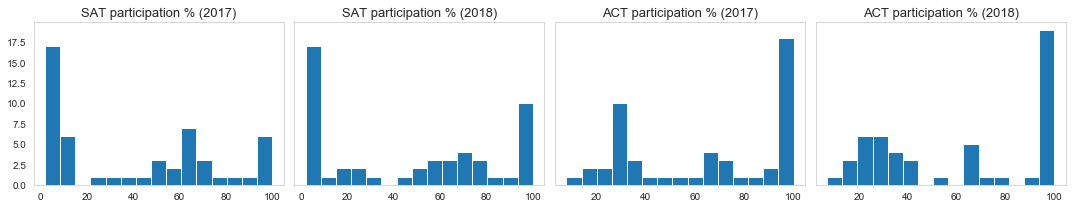

In [38]:
# Histograms: participation rates for SAT & ACT
participation = ['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']
titles = ['SAT participation % (2017)','SAT participation % (2018)','ACT participation % (2017)','ACT participation % (2018)']
xlabels = ['','','','']
subplot_histograms(final,participation,titles,xlabels)
plt.tight_layout()

#### Total scores for SAT & ACT

The distribution of total scores between SAT and ACT are generally similar, with SAT scores having slightly higher peaks. They are both bimodal and not normal. The peaks for SAT occurs at around 1100 and 1250, and for ACT at around 20 and 24. 

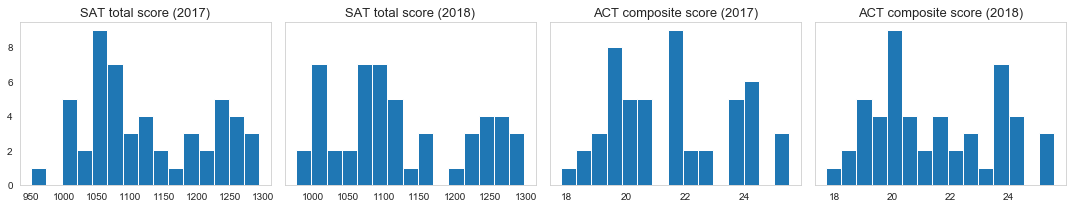

In [39]:
# Histograms: total scores for SAT & ACT
participation = ['sat_total_17','sat_total_18','act_composite_17','act_composite_18']
titles = ['SAT total score (2017)','SAT total score (2018)','ACT composite score (2017)','ACT composite score (2018)']
xlabels = ['','','','']
subplot_histograms(final,participation,titles,xlabels,)
plt.tight_layout()

#### Math scores for SAT & ACT

The distribution of math scores are also similar between SAT and ACT, and appear to be bimodal. The peaks for SAT occur at around 540 and 640, and for ACT at around 19.5 and 23. 

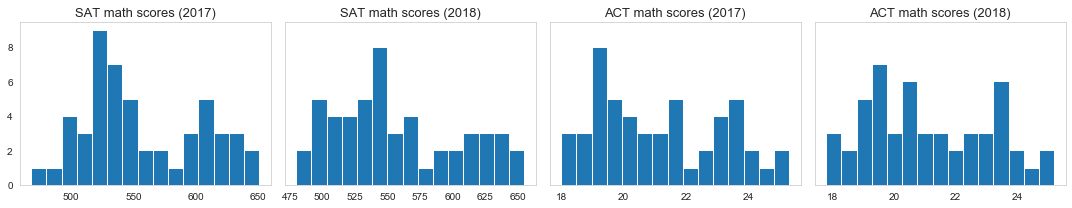

In [40]:
# Histograms: math for SAT & ACT
participation = ['sat_math_17','sat_math_18','act_math_17','act_math_18']
titles = ['SAT math scores (2017)','SAT math scores (2018)','ACT math scores (2017)','ACT math scores (2018)']
xlabels = ['','','','']
subplot_histograms(final,participation,titles,xlabels)
plt.tight_layout()

#### Reading scores for SAT & ACT

Similarly, the reading scores are not normal and have two peaks - for SAT these occur around 540 and 650, and for ACT at 21 and 25.

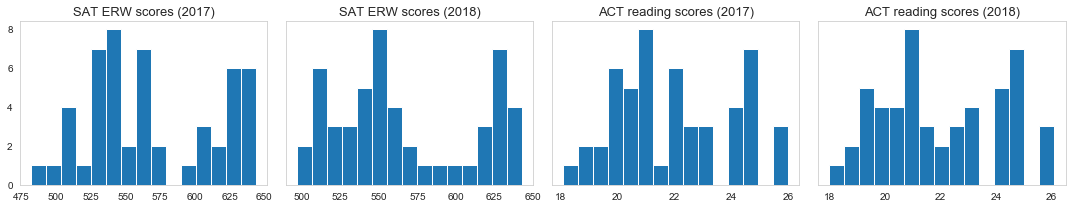

In [41]:
# Histograms: reading/verbal scores for SAT & ACT
participation = ['sat_erw_17','sat_erw_18','act_reading_17','act_reading_18']
titles = ['SAT ERW scores (2017)','SAT ERW scores (2018)','ACT reading scores (2017)','ACT reading scores (2018)']
xlabels = ['','','','']
subplot_histograms(final,participation,titles,xlabels)
plt.tight_layout()

### Boxplots

In addition to the [summary statistics](#Summary-statistics) and [historgrams](#Histograms) above, these boxplots illustrate the distribution of participation rates and scores.

The SAT score distributions for different papers and between 2017 and 2018 were largely similar. The score range for math was slightly larger than for ERW. 

For ACT, the score distributions were largely similar as well with no big variations. The english paper had the highest range among the three subject tests. 

Comparing SAT and ACT participation rates, SAT participations have a lower median, indicating that more states had higher participation rates for ACT.

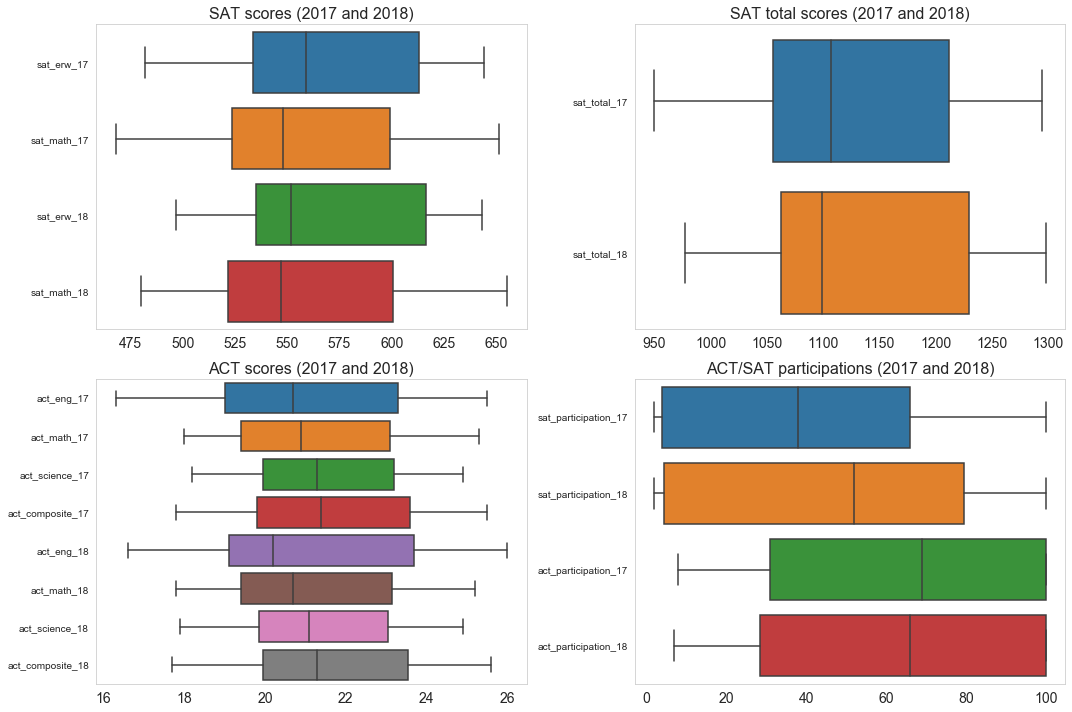

In [42]:
# set lists to split dataframe for plots
sat_scores = ['sat_erw_17','sat_math_17','sat_erw_18','sat_math_18']
sat_scores_total = ['sat_total_17','sat_total_18']
act_scores = ['act_eng_17','act_math_17','act_science_17','act_composite_17','act_eng_18','act_math_18','act_science_18','act_composite_18']
participation_total = ['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']

fig, ax = plt.subplots(2,2, figsize=(15, 10)) 

sns.boxplot(data=final[sat_scores],ax = ax[0][0],orient='h')
ax[0][0].set_title('SAT scores (2017 and 2018)',fontsize=16)
plt.setp(ax[0][0].get_xticklabels(), fontsize=14)

sns.boxplot(data=final[sat_scores_total],ax = ax[0][1],orient='h')
ax[0][1].set_title('SAT total scores (2017 and 2018)',fontsize=16)
plt.setp(ax[0][1].get_xticklabels(), fontsize=14)

sns.boxplot(data=final[act_scores],ax = ax[1][0],orient='h')
ax[1][0].set_title('ACT scores (2017 and 2018)',fontsize=16)
plt.setp(ax[1][0].get_xticklabels(), fontsize=14)

sns.boxplot(data=final[participation_total],ax = ax[1][1],orient='h')
ax[1][1].set_title('ACT/SAT participations (2017 and 2018)',fontsize=16)
plt.setp(ax[1][1].get_xticklabels(), fontsize=14)

plt.tight_layout()

### Correlation heatmap

A correlation heatmap was created to explore possible relationships between SAT and ACT participation rates and scores in 2017 and 2018, and uncover any underlying trends that may be present. 

The correlation heatmaps below show that the trends are generally similar from 2017 to 2018. SAT and ACT participations both appear to be negatively correlated with their total/composite scores. SAT participation appear to be negatively correlated with ACT participation. And there seem to be positive correlations among results for each paper in each test - people who do well in one paper tend to do well overall. States scoring well in 2017 seem to do well in 2018 as well. Conversely, there appear to be weak correlation between SAT total scores and ACT composite scores. These relationships will be examined further in [scatterplots below](#Scatterplots).

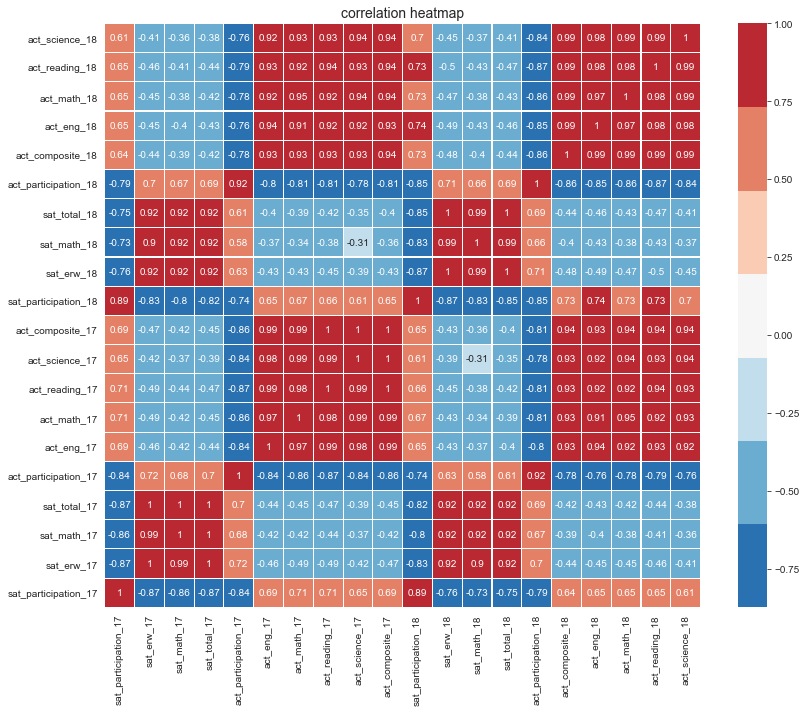

In [43]:
# plot heatmaps
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(final.corr(),linewidths=0.1,cmap=sns.color_palette("RdBu_r", 7),annot=True)
ax.set_title("correlation heatmap",fontsize=14)
ax.set_xlim(0,20)
ax.set_ylim(0,20)

plt.tight_layout()

### Scatterplots

In [44]:
# custom function for drawing scatterplot
def scatterplot(dataframe, col1, col2, title,color=None):
    sns.regplot(dataframe[col1],dataframe[col2],
                scatter_kws={'facecolors':color,'edgecolor':color},
                line_kws = {'color':'grey'})
    plt.title(title,fontsize=14)
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

The following scatterplots mostly confirm the possible trends mentioned above:
- There is only a weak negative correlation between [SAT and ACT total scores](#SAT-vs-ACT-total-scores) and [SAT and ACT subject scores](#SAT-vs-ACT-subject-scores)
- Test scores in 2017 are [positively correlated with test scores in 2018](#2017-vs-2018-total-scores)
- Participation rates in 2017 are [positively correlated with participation rates in 2018](#2017-vs-2018-participation-rates)
- SAT participation is [negatively correlated with ACT participation](#SAT-vs-ACT-participation-rates)
- Participation rates are [negatively correlated with test scores](#Participation-rates-vs-scores)
- In coastal states, [participation rates tend to be higher and scores tend to be lower for the SAT](#Participation-rates-vs-scores-(coastal-states-vs-inland-states)). This is also shown later in [chloropleth maps](#Participation-rates-and-test-scores)

Therefore, efforts to increase SAT participation rates in a particular state is likely to reduce the state's participation in ACT, but will also reduce the average SAT score.

#### SAT vs ACT total scores

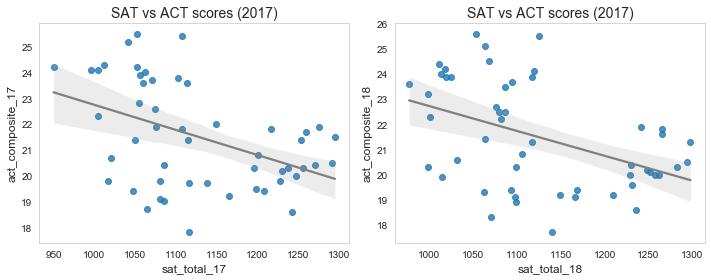

In [45]:
plt.figure(figsize=(10,4))

# Scatterplot: SAT vs ACT (2017)
plt.subplot(1,2,1)
scatterplot(final,'sat_total_17','act_composite_17','SAT vs ACT scores (2017)')
# Scatterplot: SAT vs ACT (2018)
plt.subplot(1,2,2)
scatterplot(final,'sat_total_18','act_composite_18','SAT vs ACT scores (2017)')

plt.tight_layout()

#### SAT vs ACT subject scores

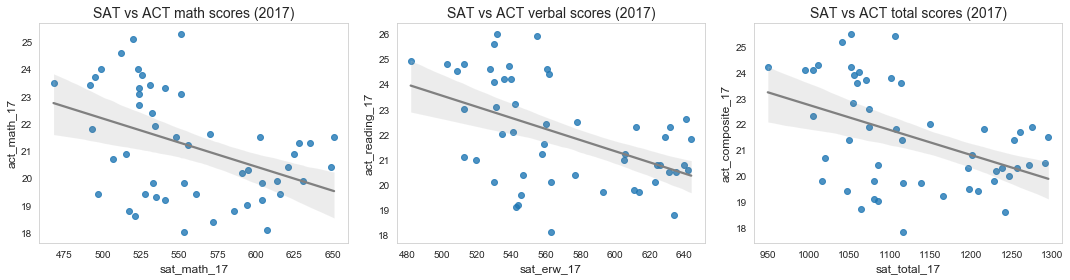

In [46]:
plt.figure(figsize=(15,4))

# Scatterplot: SAT vs. ACT math scores for 2017
plt.subplot(1,3,1)
scatterplot(final,'sat_math_17','act_math_17','SAT vs ACT math scores (2017)')
# Scatterplot: SAT vs. ACT math scores for 2018
plt.subplot(1,3,2)
scatterplot(final,'sat_erw_17','act_reading_17','SAT vs ACT verbal scores (2017)')
# Scatterplot: SAT vs. ACT total/composite scores for 2017
plt.subplot(1,3,3)
scatterplot(final,'sat_total_17','act_composite_17','SAT vs ACT total scores (2017)')

plt.tight_layout()

#### 2017 vs 2018 total scores

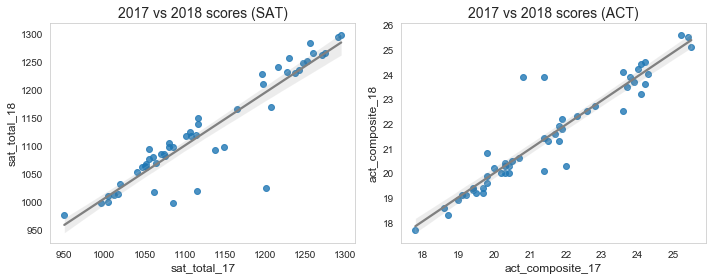

In [47]:
plt.figure(figsize=(10,4))

# Scatterplot: Total scores for SAT 2017 vs. 2018
plt.subplot(1,2,1)
scatterplot(final,'sat_total_17','sat_total_18','2017 vs 2018 scores (SAT)')
# Scatterplot: Composite scores for ACT 2017 vs. 2018
plt.subplot(1,2,2)
scatterplot(final,'act_composite_17','act_composite_18','2017 vs 2018 scores (ACT)')

plt.tight_layout()

#### 2017 vs 2018 participation rates

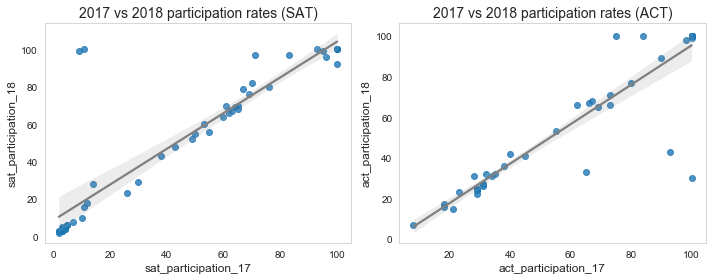

In [48]:
plt.figure(figsize=(10,4))

# Scatterplot: participation rates for SAT 2017 vs. 2018
plt.subplot(1,2,1)
scatterplot(final,'sat_participation_17','sat_participation_18','2017 vs 2018 participation rates (SAT)')
# Scatterplot: participation rates for ACT 2017 vs. 2018
plt.subplot(1,2,2)
scatterplot(final,'act_participation_17','act_participation_18','2017 vs 2018 participation rates (ACT)')

plt.tight_layout()

#### SAT vs ACT participation rates

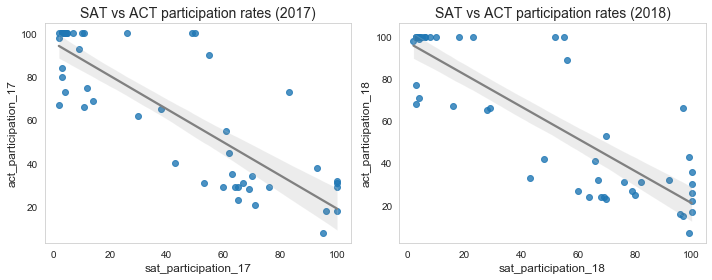

In [49]:
plt.figure(figsize=(10,4))

# Scatterplot: SAT vs ACT participation rates (2017)
plt.subplot(1,2,1)
scatterplot(final,'sat_participation_17','act_participation_17','SAT vs ACT participation rates (2017)')
# Scatterplot: SAT vs ACT participation rates (2018)
plt.subplot(1,2,2)
scatterplot(final,'sat_participation_18','act_participation_18','SAT vs ACT participation rates (2018)')

plt.tight_layout()

#### Participation rates vs scores

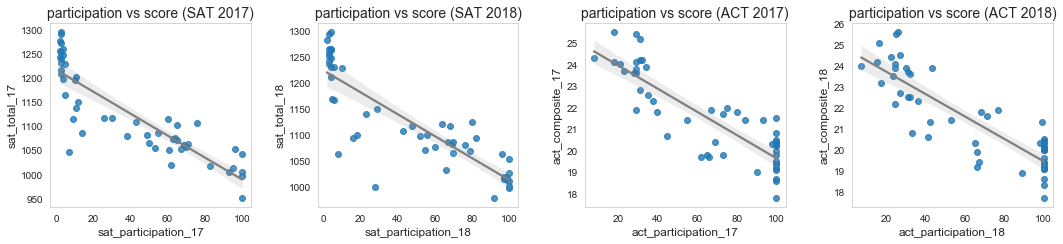

In [50]:
plt.figure(figsize=(15,3.5))

# Scatterplot: participation rate vs score (SAT 2017)
plt.subplot(1,4,1)
scatterplot(final,'sat_participation_17','sat_total_17','participation vs score (SAT 2017)')
# Scatterplot: participation rate vs score (SAT 2018)
plt.subplot(1,4,2)
scatterplot(final,'sat_participation_18','sat_total_18','participation vs score (SAT 2018)')
# Scatterplot: participation rate vs score (ACT 2017)
plt.subplot(1,4,3)
scatterplot(final,'act_participation_17','act_composite_17','participation vs score (ACT 2017)')
# Scatterplot: participation rate vs score (ACT 2018)
plt.subplot(1,4,4)
scatterplot(final,'act_participation_18','act_composite_18','participation vs score (ACT 2018)')

plt.tight_layout()

#### Participation rates vs scores (coastal states vs inland states)

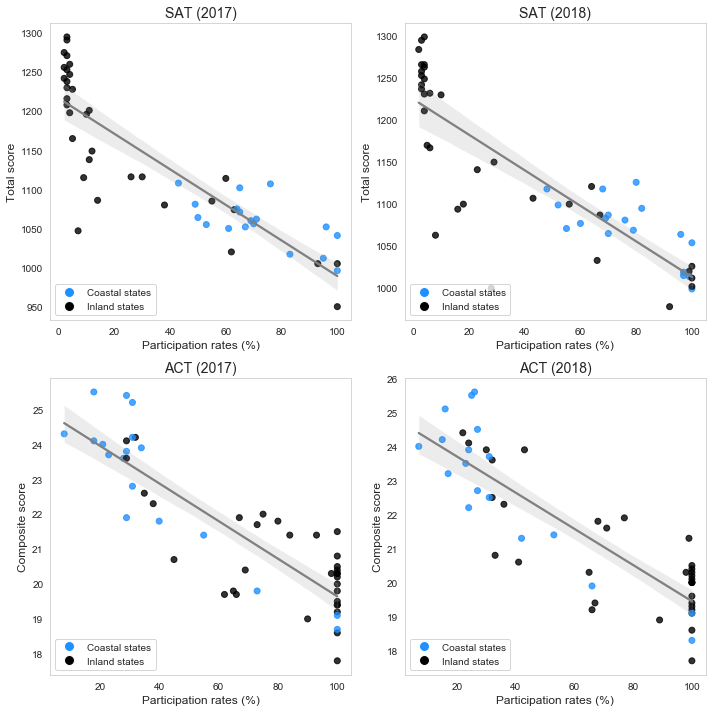

In [51]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# highlight coastal states
coastal_states = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', \
                  'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'Virginia', 'North Carolina',\
                  'South Carolina','Georgia', 'Florida','California', 'Oregon', 'Washington']
colourmap = ['dodgerblue' if state in coastal_states else 'black' for state in final.index]

plt.figure(figsize=(10,10))

# Scatterplot: participation rate vs score (SAT 2017)
plt.subplot(2,2,1)
scatterplot(final,'sat_participation_17','sat_total_17','SAT (2017)',color=colourmap)
plt.xlabel('Participation rates (%)')
plt.ylabel('Total score')
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Coastal states',
                          markerfacecolor='dodgerblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Inland states',
                          markerfacecolor='black', markersize=10)]
plt.legend(handles=legend_elements, loc='lower left')

# Scatterplot: participation rate vs score (SAT 2018)
plt.subplot(2,2,2)
scatterplot(final,'sat_participation_18','sat_total_18','SAT (2018)',color=colourmap)
plt.xlabel('Participation rates (%)')
plt.ylabel('Total score')
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Coastal states',
                          markerfacecolor='dodgerblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Inland states',
                          markerfacecolor='black', markersize=10)]
plt.legend(handles=legend_elements, loc='lower left')

# Scatterplot: participation rate vs score (ACT 2017)
plt.subplot(2,2,3)
scatterplot(final,'act_participation_17','act_composite_17','ACT (2017)',color=colourmap)
plt.xlabel('Participation rates (%)')
plt.ylabel('Composite score')
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Coastal states',
                          markerfacecolor='dodgerblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Inland states',
                          markerfacecolor='black', markersize=10)]
plt.legend(handles=legend_elements, loc='lower left')

# Scatterplot: participation rate vs score (ACT 2018)
plt.subplot(2,2,4)
scatterplot(final,'act_participation_18','act_composite_18','ACT (2018)',color=colourmap)
plt.xlabel('Participation rates (%)')
plt.ylabel('Composite score')
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Coastal states',
                          markerfacecolor='dodgerblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Inland states',
                          markerfacecolor='black', markersize=10)]
plt.legend(handles=legend_elements, loc='lower left')


plt.tight_layout()

### Bar plots
#### Participation rates in non-mandatory states

As [explained above](#Participation-rates), efforts to increase participation rates for the SAT should not be invested in states currently with mandatory ACT tests, as they may not be as effective. These bar plots were created to illustrate how particiption rates in each state compare with the others, in order to better select a state to focus on, to improve said rates. States where the ACT mandatory were excluded from the plots as they are unsuitable candidates, and states where SATs are mandatory are also excluded as they already have 100% participation rates. 

In both 2017 and 2018, the seven states with SAT participation rates below the 25th percentile are (in descending order of participation rates) Arizona, West Virginia, New Mexico, Kansas, South Dakota, Iowa, and North Dakota. Below the 50th percentile, these further include Vermont, Hawaii, California, Oregon, and Alaska. 

For the ACT, Maryland, Pennsylvania, Rhode Island, New Hampshire, and Maine had participation rates less than the 25th percentile in 2017. In 2018, Maryland was replaced by Washington. Below the 50th percentile, there were also Indiana, New Jersey, California, New York, Virginia, Vermont, and Massachusetts in 2017. In 2018, these included Indiana, New Jersey, Maryland, California, New York, Massachusetts, Virginia, and Vermont. 

In [52]:
# slicing out participation rates of states without mandatory testing
voluntary_states = final[(final.sat_participation_17!=100) & (final.act_participation_17!=100) & \
                         (final.sat_participation_18!=100) & (final.act_participation_18!=100)]
# remove Illinois as it made SAT compulsory in 2018 but somehow had only 99% participation
voluntary_states = voluntary_states[voluntary_states.index != 'Illinois']

# summary stats for voluntary states
voluntary_states[['sat_participation_17','sat_participation_18','act_participation_17', \
                 'act_participation_18']].describe().T

count       mean        std  min    25%   50%    75%   max
sat_participation_17   26.0  50.846154  28.938130  2.0  32.00  61.5  68.50  96.0
sat_participation_18   26.0  56.615385  31.351015  2.0  32.50  66.5  78.25  99.0
act_participation_17   26.0  47.230769  24.410338  8.0  29.00  37.5  66.75  98.0
act_participation_18   26.0  43.923077  24.934992  7.0  24.25  32.5  66.00  98.0

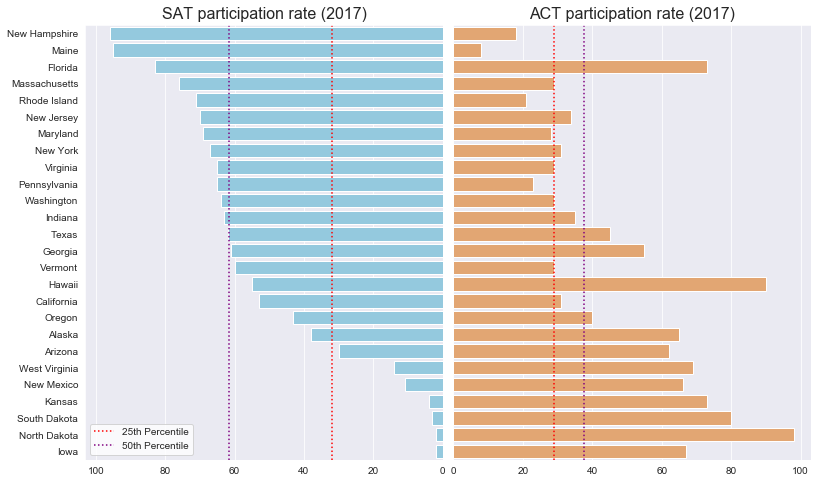

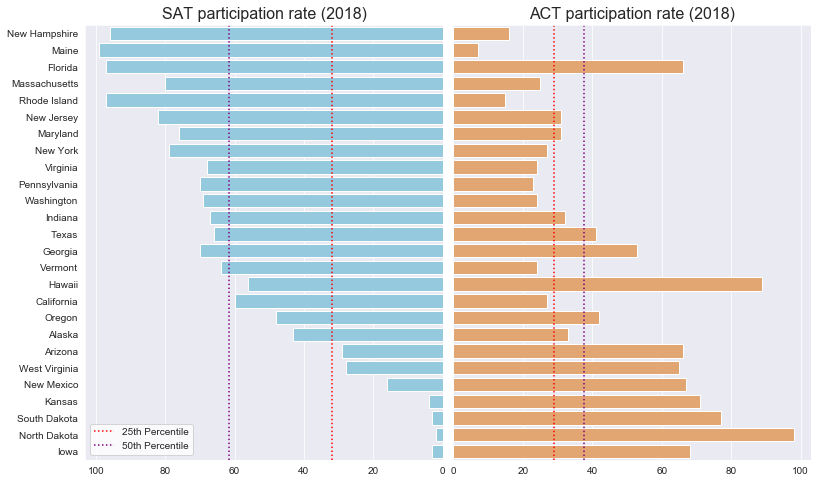

In [53]:
################
#  2017 plots  #
################
sns.set_style('darkgrid')

fig, ax = plt.subplots(1,2,figsize=(13, 8),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2017
voluntary_states = voluntary_states.sort_values(by='sat_participation_17',ascending=False)
sns.barplot(y=voluntary_states.index.values, x='sat_participation_17',data=voluntary_states,
            color='skyblue',ax=ax[0])
ax[0].set_title('SAT participation rate (2017)',fontsize=16)
ax[0].set_xlabel('')
# add vertical lines for 25th percentile
ax[0].axvline(x=32,linestyle='dotted',color='red',label='25th Percentile')
ax[0].axvline(x=61.5,linestyle='dotted',color='purple',label='50th Percentile')
ax[0].legend(loc='lower left',facecolor='white',fontsize=10)
ax[0].set_xlim(0,103)
ax[0].invert_xaxis()

# ACT participation 2017
sns.barplot(y=voluntary_states.index.values, x='act_participation_17',data=voluntary_states,
            color='sandybrown',ax=ax[1])
ax[1].set_title('ACT participation rate (2017)',fontsize=16)
ax[1].set_xlabel('')
# add vertical lines for 25th percentile
ax[1].axvline(x=29,linestyle='dotted',color='red',label='25th Percentile')
ax[1].axvline(x=37.5,linestyle='dotted',color='purple',label='50th Percentile')

################
#  2018 plots  #
################

fig, ax = plt.subplots(1,2,figsize=(13, 8),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2018
sns.barplot(y=voluntary_states.index.values, x='sat_participation_18',data=voluntary_states,
            color='skyblue',ax=ax[0])
ax[0].set_title('SAT participation rate (2018)',fontsize=16)
ax[0].set_xlabel('')
# add vertical lines for 25th percentile
ax[0].axvline(x=32,linestyle='dotted',color='red',label='25th Percentile')
ax[0].axvline(x=61.5,linestyle='dotted',color='purple',label='50th Percentile')
ax[0].legend(loc='lower left',facecolor='white',fontsize=10)
ax[0].set_xlim(0,103)
ax[0].invert_xaxis()

# ACT participation 2018
#voluntary_states = voluntary_states.sort_values(by='act_participation_17',ascending=False)
sns.barplot(y=voluntary_states.index.values, x='act_participation_18',data=voluntary_states,
            color='sandybrown',ax=ax[1])
ax[1].set_title('ACT participation rate (2018)',fontsize=16)
ax[1].set_xlabel('')
# add vertical lines for 25th percentile
ax[1].axvline(x=29,linestyle='dotted',color='red',label='25th Percentile')
ax[1].axvline(x=37.5,linestyle='dotted',color='purple',label='50th Percentile')

Text(0.5, 0, '')

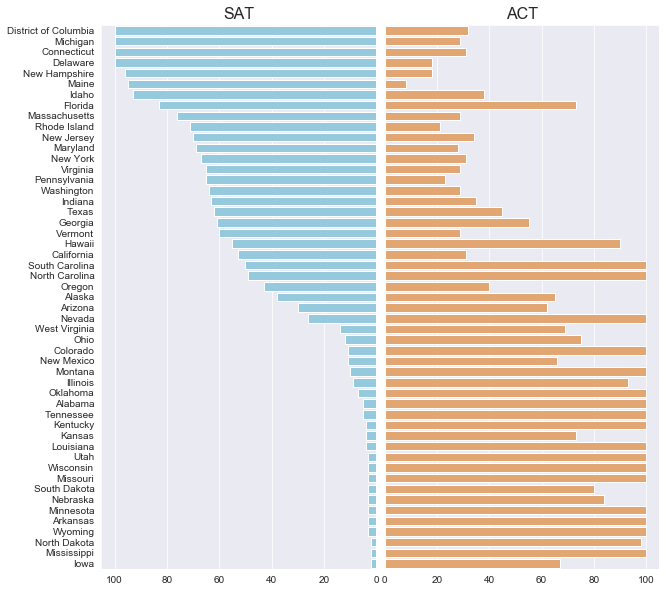

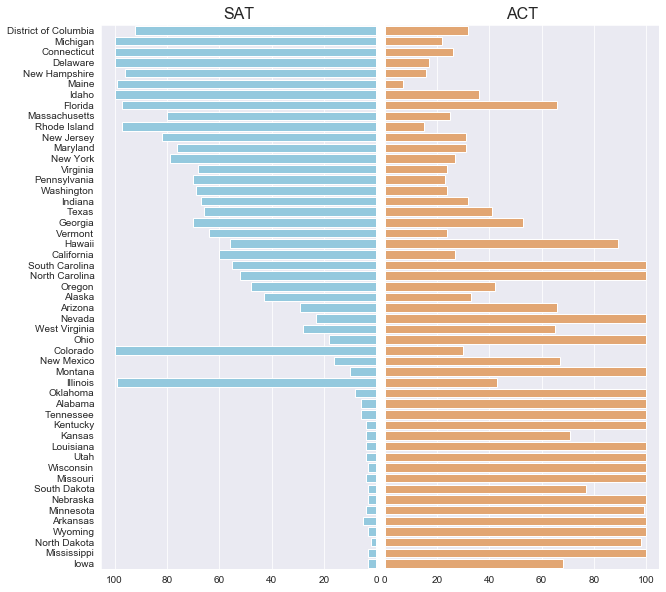

In [54]:
# Plots for presentation (include mandatory testing states and with fewer labels)

################
#  2017 plots  #
################

fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2017
final = final.sort_values(by='sat_participation_17',ascending=False)
sns.barplot(y=final.index.values, x='sat_participation_17',data=final,color='skyblue',ax=ax[0])
ax[0].set_title('SAT',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

# ACT participation 2017
#voluntary_states = voluntary_states.sort_values(by='act_participation_17',ascending=False)
sns.barplot(y=final.index.values, x='act_participation_17',data=final,color='sandybrown',ax=ax[1])
ax[1].set_title('ACT',fontsize=16)
ax[1].set_xlabel('')

################
#  2018 plots  #
################

fig, ax = plt.subplots(1,2,figsize=(10, 10),sharey=True) 
plt.subplots_adjust(wspace=0.03)

# SAT participation 2018
sns.barplot(y=final.index.values, x='sat_participation_18',data=final,color='skyblue',ax=ax[0])
ax[0].set_title('SAT',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

# ACT participation 2018
#voluntary_states = voluntary_states.sort_values(by='act_participation_17',ascending=False)
sns.barplot(y=final.index.values, x='act_participation_18',data=final,color='sandybrown',ax=ax[1])
ax[1].set_title('ACT',fontsize=16)
ax[1].set_xlabel('')


### Chloropleth maps

#### Participation rates and test scores

In [55]:
# obtain df of state abbreviations
sample_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
state_code = sample_df.iloc[:,:2]

# merge state codes into existing df
final_code = pd.merge(final,state_code,left_index=True,right_on="state",how='outer')
final_code = final_code.set_index('state')

# put in missing value for Columbia
final_code.loc['District of Columbia','code']='DC'

SAT is more popular in the coastal states ([where population densities are the highest](https://www.reddit.com/r/MapPorn/comments/cowymr/population_density_in_the_united_states_oc/)), whereas ACT is more popular inland. This is in contrast to the scores, which for SAT are higher inland and for ACT along the coasts. 

Trends from 2018 are largely similar to 2017, except for a few states that have adopted mandatory (100%) SAT testing instead of ACT.

In [56]:
import plotly.graph_objects as go

# chloropleth of sat participation 2017
fig = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['sat_participation_17'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Percentage (%)",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig.update_layout(title_text = 'SAT Participation Rates in 2017 (%)', 
                  geo_scope='usa', width=600, height=400,)
fig.show()

# chloropleth of act participation 2017
fig2 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['act_participation_17'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Percentage (%)",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig2.update_layout(title_text = 'ACT Participation Rates in 2017 (%)', 
                  geo_scope='usa', width=600, height=400,)
fig2.show()

# chloropleth of sat total score 2017
fig3 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['sat_total_17'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Score",
                                colorbar_thickness = 15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig3.update_layout(title_text = 'SAT Total Score (2017)', 
                  geo_scope='usa', width=600, height=400,)
fig3.show()

# chloropleth of act total score 2017
fig4 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['act_composite_17'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Score",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig4.update_layout(title_text = 'ACT Composite Score (2017)', 
                  geo_scope='usa', width=600, height=400,)
fig4.show()

In [57]:
import plotly.graph_objects as go

# chloropleth of sat participation 2018
fig = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['sat_participation_18'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Percentage (%)",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig.update_layout(title_text = 'SAT Participation Rates in 2018 (%)', 
                  geo_scope='usa', width=1000, height=700,)
fig.show()

# chloropleth of act participation 2018
fig2 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['act_participation_18'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Percentage (%)",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig2.update_layout(title_text = 'ACT Participation Rates in 2018 (%)', 
                  geo_scope='usa', width=600, height=400,)
fig2.show()

# chloropleth of sat total score 2018
fig3 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['sat_total_18'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Score",
                                colorbar_thickness = 15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig3.update_layout(title_text = 'SAT Total Score (2018)', 
                  geo_scope='usa', width=600, height=400,)
fig3.show()

# chloropleth of act total score 2018
fig4 = go.Figure(go.Choropleth(locations=final_code['code'], 
                                z = final_code['act_composite_18'],
                                locationmode = 'USA-states',
                                colorscale = 'Reds',
                                colorbar_title = "Score",
                                colorbar_thickness=15,
                                text = final_code.index,
                                hoverinfo = 'text + z'))
fig4.update_layout(title_text = 'ACT Composite Score (2018)', 
                  geo_scope='usa', width=600, height=400,)
fig4.show()

<br><br>
## Descriptive and Inferential Statistics
---

### Summarising distributions
**We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?**

No, we do not.

### Estimate Limits of Data

**Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. Does it make sense to conduct statistical inference given these data specifically?**

No. The participation rates are not independent and contain overlapping portions, as some individuals take both the SAT and ACT, and would be counted in both participation rates.

<b>Is it appropriate to compare \*these\* specific SAT and ACT math scores?</b>

No. Assuming the population is every test-taking individual, the samples in these datasets are not randomly drawn as they are grouped by state, and they also do not have the same sample size as the number of people taking the tests in each state is different. Furthermore, the SAT is scored on a different scale from the ACT. One would first need to convert SAT scores to ACT equivalents (or vice versa) before making any comparisons.

<br><br>
## Outside Research
---

[Earlier scatterplots](#2017-vs-2018-participation-rates) showed a few states that had greater than usual changes in their SAT/ACT participation rates. The scatterplots below were created to highlight these states, and show that Illinois and Colorado saw the biggest changes in their SAT/ACT participation rates from 2017 to 2018. These two states were therefore selected for further examination. Alaska, although not seeing a change in SAT participation rates, had a notable decline in ACT participation rates from 2017 to 2018. It will also be included in the discussion below.

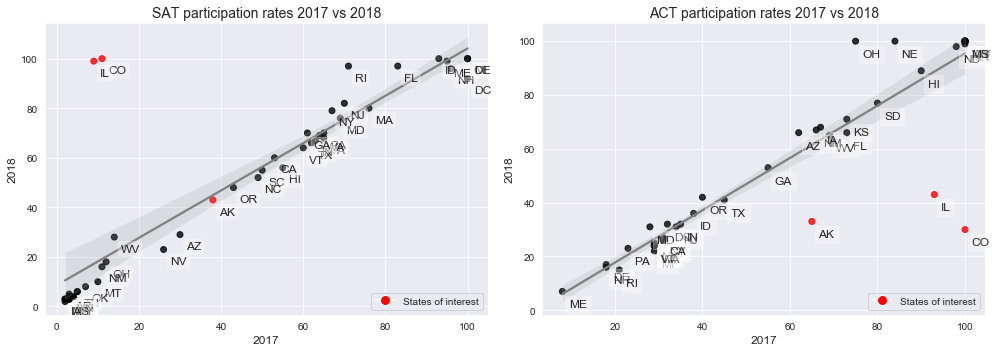

In [58]:
fig, ax = plt.subplots(ncols = 2, nrows=1, figsize=(14,5))
colourmap = ['red' if state == "Alaska" or state == "Illinois" or \
             state == "Colorado" else 'black' for state in final_code.index ]

# Scatterplot: SAT 2017 vs 2018
sns.regplot(final_code.sat_participation_17,final_code.sat_participation_18,
            scatter_kws={'facecolors':colourmap,
                         'edgecolor':colourmap},
            line_kws = {'color':'grey'},ax=ax[0])
ax[0].set_title('SAT participation rates 2017 vs 2018',fontsize=14)
ax[0].set_xlabel('2017',fontsize=12)
ax[0].set_ylabel('2018',fontsize=12)
labels = final_code['code']
for i, txt in enumerate(labels):
    ax[0].annotate(txt, 
                   (final['sat_participation_17'][i]+1.5, final['sat_participation_18'][i]-6),
                  bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
                  fontsize=12)
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='States of interest',
                          markerfacecolor='red', markersize=10)]
ax[0].legend(handles=legend_elements, loc='lower right')

# Scatterplot: ACT 2017 vs 2018
sns.regplot(final_code.act_participation_17,final_code.act_participation_18,
            scatter_kws={'facecolors':colourmap,
                         'edgecolor':colourmap},
            line_kws = {'color':'grey'},ax=ax[1])
ax[1].set_title('ACT participation rates 2017 vs 2018',fontsize=14)
ax[1].set_xlabel('2017',fontsize=12)
ax[1].set_ylabel('2018',fontsize=12)
labels = final_code['code']
for i, txt in enumerate(labels):
    ax[1].annotate(txt, 
                   (final['act_participation_17'][i]+1.5, final['act_participation_18'][i]-6),
                  bbox=dict(boxstyle='square',pad=0.3, fc='white', alpha=0.3),
                  fontsize=12)
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='States of interest',
                          markerfacecolor='red', markersize=10)]
ax[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()

### Illinois
Illinois saw a drastic increase in SAT participation from 2017 to 2018 - from 9% to 99%, while ACT participation rates dropped by half (from 93% to 43%). 

The state has administered the ACT for free for 15 years, until it was replaced with the SAT in 2016 <sup>[[4]](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html),[[5]](https://www.bnd.com/news/local/article50939170.html#storylink=cpy)</sup>. However, due to a state budget impasse, statewide college testing was not funded until 2017, when the first statewide SAT was administered, on 5 April <sup>[[6]](https://www.testive.com/illinois/)</sup>. The popularity of ACT decreased accordingly but not dramatically, likely as students applying to in-state universities still required the ACT. (As students in the US take the SAT/ACT in Year 11 and do not graduate until Year 12, their results would only be reflected in the official SAT/ACT report of the following year. I.e., students taking the tests in 2017 would have been from the class of 2018, and would be included in the 2018 SAT/ACT reports). 

### Colorado
In Colorado, SAT participation rates increased from 11% to 100% from 2017 to 2018, whereas ACT participation rates dropped from 100% to 30% in the same period.

Like Illinois, the ACT was the mandatory state-administered test until 2017 <sup>[[7]](https://www.coloradokids.org/wp-content/uploads/2016/01/ACTvsSAT_FINAL.pdf), [[8]](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)</sup>. The first state-wide SAT took place on 11 April 2017, which the state sponsored and all students took part in <sup>[[8]](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)</sup>. Accordingly, participation rates jumped from 2017 to 2018 (reflecting the students who took the tests in 2016 and 2017). 

### Alaska
Although participation rates for the SAT remained relatively similar across 2017 and 2018 in Alaska (38% and 43%), ACT participation rates dropped from 65% to 33%. 

Unlike the previous two states however, Alaska instead removed mandatory testing requirements. 2017 saw the expiration of a regulation that required high school students to take either the SAT, ACT, or a [WorkKeys assessment](https://www.act.org/content/act/en/products-and-services/workkeys-for-job-seekers/assessments.html) to graduate with a high school diploma <sup>[[9]](https://www.alaskapublic.org/2016/07/01/alaska-changes-hs-diploma-requirements-no-more-sat-act/),[[10]](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/)</sup>. This likely resulted in some students forgoing the tests, causing a decline in participation rates. However, it is uncertain why the decline occurred with ACT rather than SAT, although it may be due to college admission requirements and perceived ease of the tests.

<br><br>
## Conclusions and Recommendations
---

From the above analysis, the key takeaways are:
>- High participation rates in one test usually means low participation rates in the other
- Participation rates are negatively correlated with test scores
- Test scores remained largely similar between 2017 and 2018, as did the states that scored the highest/lowest
- SAT is more popular among the coastal states, whereas ACT is more popular inland
- However SAT scores tend to be lower among the coastal states

Based on everything that was discussed above, it is recommended that efforts to increase participation rates should be focused on **California**. However, increasing the state's participation rates is likely to reduce its average score. The key resasons behind this recommendation are:
>1. No mandatory testing
    - Mandatory testing for one test usually results in low participation rates of the other.
    - It will be difficult to raise low participation rates in one test without first making the other voluntary.
2. Low rates
    - While California was not among the states with the lowest participation rates, it was still below the 50th percentile in both 2017 and 2018.
3. And last but not the least, high population density
    - As the most populous state in the US in both 2017 and 2018 <sup>[[11]](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2017_PEPANNRES&src=pt)</sup>, it is also the 9<sup>th</sup> most dense <sup>[[12]](https://www.census.gov/geo/reference/state-area.html)</sup>, far surpassing the population densities of other states with low participation rates:
    <img src="../images/graphs/_EXTERNAL_maps_popdensity_sqm_2010.jpg" width="500" align="center"><br>
<font size=2 color="gray">(US population density 2010 (individuals per square mile). Source: [US Office of Energy Efficiency and Renewable Energy](https://www.energy.gov/eere/vehicles/fact-661-february-7-2011-population-density))</font><br><br>
    - This allows for greater efficiency in the distribution of manpower and efforts to increase SAT participation rates.

Possible measures to increase SAT participation rates might include:
>- Reducing SAT fees to make it more competitive against the ACT, with which it is currently rather similarly priced <sup>[[13]](https://blog.prepscholar.com/sat-cost-act-cost-and-how-to-save-money)</sup>. This could either be in the form of reducing cost of participation or introducing more inclusive fee waiver criteria. 
- Making practice resources more readily available online and in school libraries, either for free or at a reduced price.
- Introduce other forms of scoring (in line with the recently introduced Adversity Score <sup>[[14]](https://www.nytimes.com/2019/05/16/us/sat-score.html?module=inline)</sup>) that measure certain socioeconomic indicators, which may give certain students higher chances of university admission and hence convince them to take the SAT.

Additional data that would be helpful:
>- Participation rates and performance by cities or school districts.
- Other state-wise statistics that may have affected participation rates, e.g. socialeconomic indicators like income, race, etc.